In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [169]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [171]:
# remove not needed data
df = df.drop(columns = ['Surname', 'id'])
test = test.drop(columns = ['Surname'])

In [172]:
# One hot encode the categorical variables, 

categorical_features = df.select_dtypes(include = ['object']).columns.tolist()
df = pd.get_dummies(df, columns = categorical_features, prefix = categorical_features, dtype = float)
test = pd.get_dummies(test, columns = categorical_features, prefix = categorical_features, dtype = float)

In [173]:
test.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75,1.0,0.0,0.0,1.0,0.0
1,165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27,1.0,0.0,0.0,1.0,0.0
2,165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09,1.0,0.0,0.0,1.0,0.0
3,165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57,1.0,0.0,0.0,0.0,1.0
4,165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,1.0,0.0,0.0,1.0


In [174]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.0,0.0,0.0,0.0,1.0
1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1.0,0.0,0.0,0.0,1.0
2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1.0,0.0,0.0,0.0,1.0
3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,0.0,0.0,0.0,1.0
4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,0.0,1.0,0.0,1.0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerId         165034 non-null  int64  
 1   CreditScore        165034 non-null  int64  
 2   Age                165034 non-null  float64
 3   Tenure             165034 non-null  int64  
 4   Balance            165034 non-null  float64
 5   NumOfProducts      165034 non-null  int64  
 6   HasCrCard          165034 non-null  float64
 7   IsActiveMember     165034 non-null  float64
 8   EstimatedSalary    165034 non-null  float64
 9   Exited             165034 non-null  int64  
 10  Geography_France   165034 non-null  float64
 11  Geography_Germany  165034 non-null  float64
 12  Geography_Spain    165034 non-null  float64
 13  Gender_Female      165034 non-null  float64
 14  Gender_Male        165034 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 18.9 MB


<Axes: >

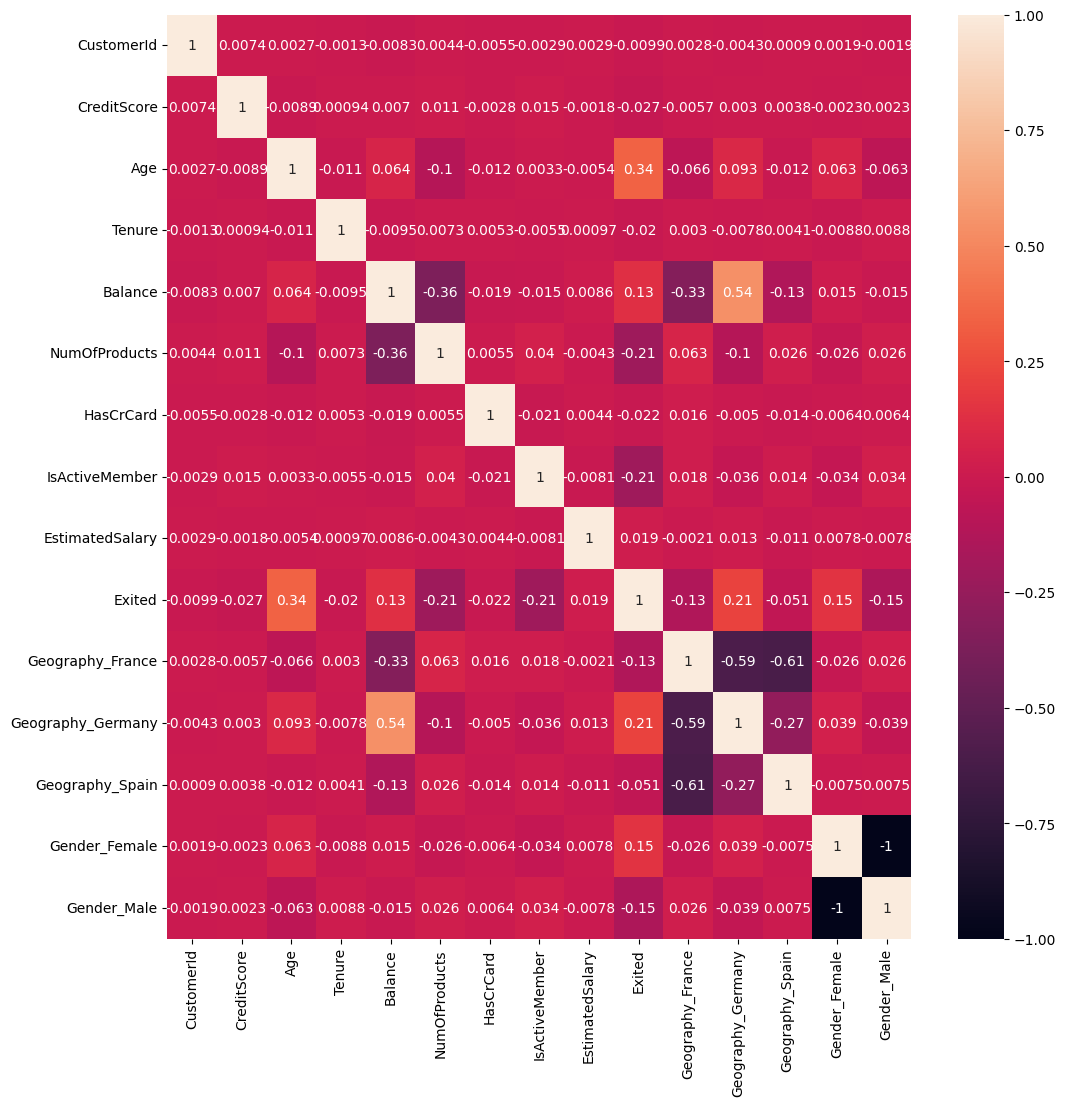

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(df.corr(), annot = True, ax = ax)

In [177]:
y = df['Exited']
X = df.drop(columns = ['Exited'])

In [178]:
# not important for prediction
X = X.drop(columns=['CustomerId'])
test = test.drop(columns=['CustomerId'])

In [179]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1.0,0.0,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1.0,0.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1.0,0.0,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1.0,0.0,0.0,0.0,1.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,0.0,1.0,0.0,1.0


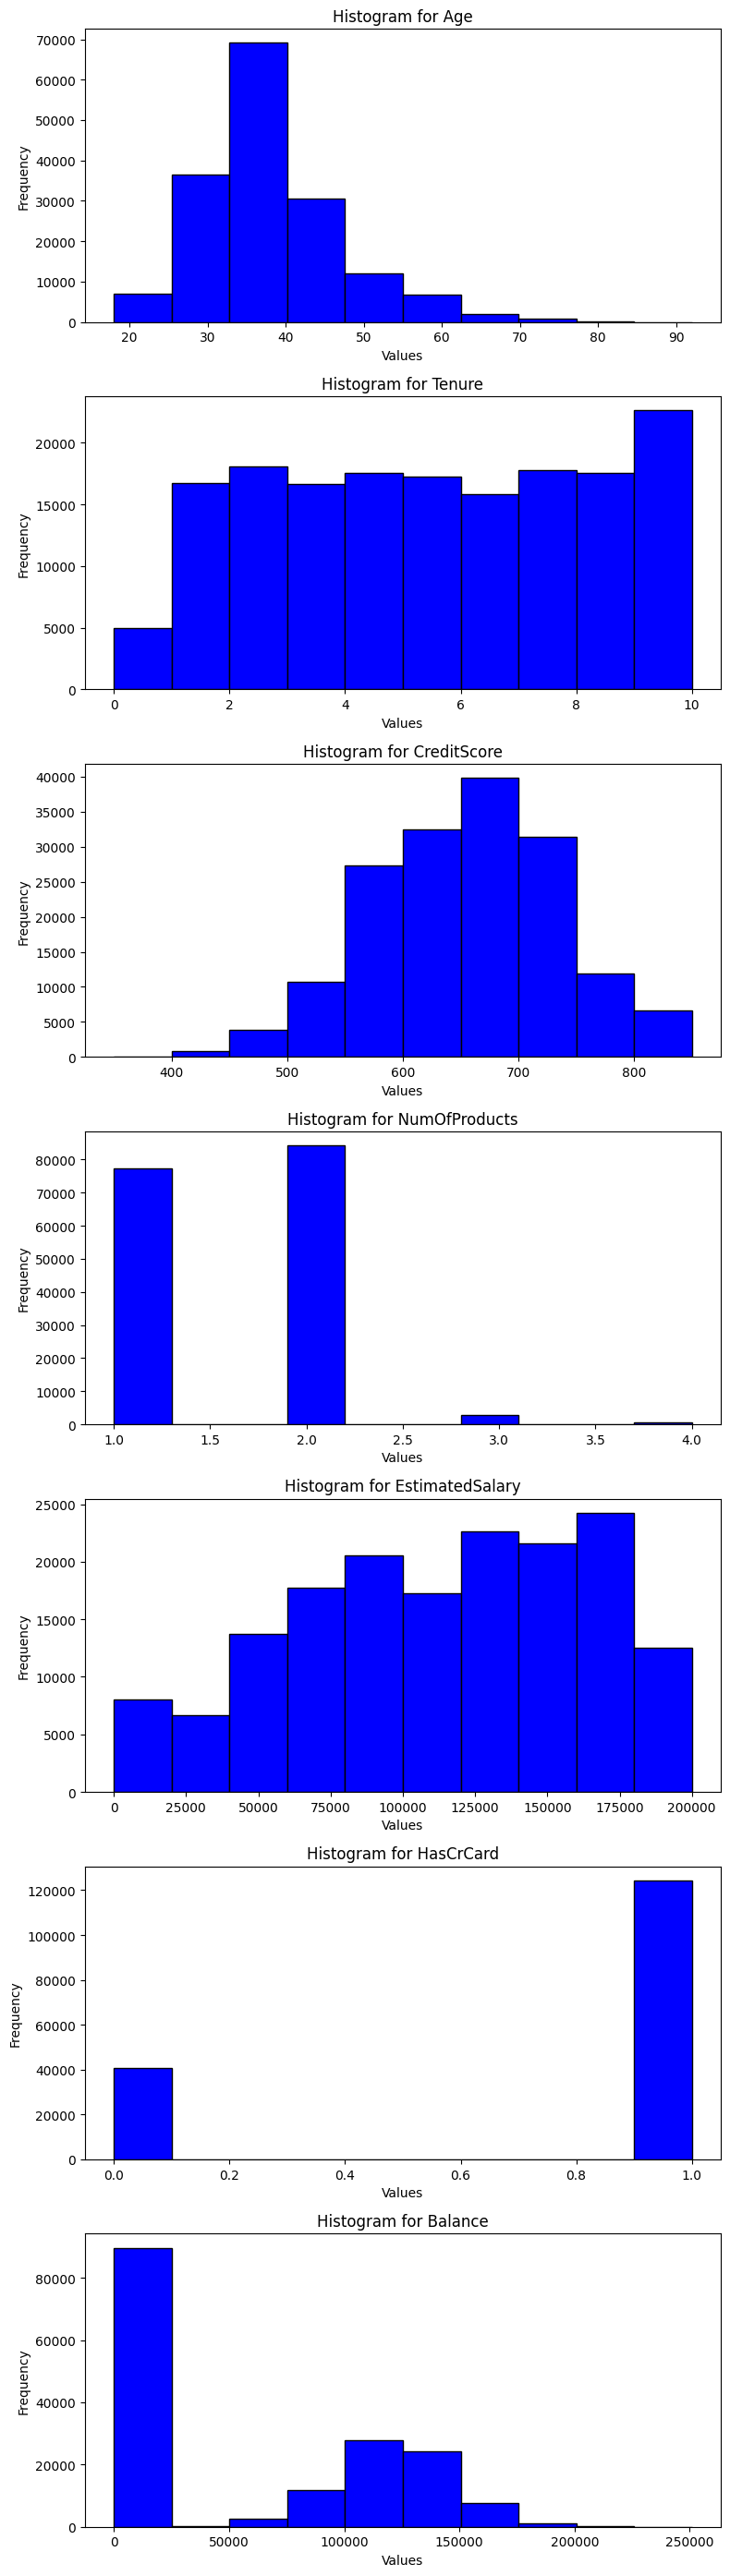

In [180]:
columns_graphed = ['Age', 'Tenure', 'CreditScore', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'Balance']

num_plots = len(columns_graphed)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))

for i, column in enumerate(columns_graphed):
    column_data = df[column]
    axes[i].hist(column_data, bins=10, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

columns_scaled = ['Age', 'Tenure', 'CreditScore', 'EstimatedSalary']
scaler = StandardScaler()

scaler2 = MinMaxScaler()

X[columns_scaled] = scaler.fit_transform(X[columns_scaled])
X[['Balance']] = scaler2.fit_transform(X[['Balance']])


In [182]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.144135,-0.578074,-0.719973,0.000000,2,1.0,0.0,1.369486,1.0,0.0,0.0,0.0,1.0
1,-0.367706,-0.578074,-1.432694,0.000000,2,1.0,1.0,-1.254085,1.0,0.0,0.0,0.0,1.0
2,0.268974,0.211354,1.774548,0.000000,2,1.0,0.0,1.437422,1.0,0.0,0.0,0.0,1.0
3,-0.941966,-0.465299,-1.076334,0.593398,1,1.0,1.0,-0.557018,1.0,0.0,0.0,0.0,1.0
4,0.743362,-0.578074,-0.007253,0.000000,2,1.0,1.0,-1.938770,0.0,0.0,1.0,0.0,1.0


In [183]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [185]:
# Creating a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100,500,1000,1500,2000,3000],
    'min_samples_split': [2, 3, 5, 7, 10, 15], 
    'max_depth': [1,5,10,30,50,100],
    'min_samples_leaf': [1, 2, 3, 4],
}


rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   5.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   5.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   5.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   6.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   7.5s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.4s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.9s
[CV] END max_depth=100, min_sa

KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 500, 1000], 
                  'max_depth': [10, 50, 100], 
                  'min_samples_split': [5, 10, 20]}

rf_final = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(rf_final, param_grid, cv = 3)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
test.head()

In [ ]:
df.head()

In [ ]:
print(test.shape)
print(df.shape)

In [ ]:
ids = test['id']
final_test = test.drop(columns = ['id'])

In [ ]:
rf_results = grid_search.predict(final_test)

In [ ]:
output = pd.DataFrame({'id': ids, 'Exited': rf_results})
output.to_csv('submission.csv', index=False)

In [ ]:
grid_search.predict(test)

In [ ]:
grid_search.best_model